# Task 1: Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets

In [3]:
customers = pd.read_csv('D:\Datasets\Customers.csv')

In [4]:
products = pd.read_csv('D:\Datasets\Products.csv')

In [5]:
transactions = pd.read_csv('D:\Datasets\Transactions.csv')

# # Merge datasets

In [7]:
data = pd.merge(transactions, customers, on='CustomerID', how='left')

In [8]:
data = pd.merge(data, products, on='ProductID', how='left')

# Convert dates to datetime

In [9]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

In [10]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Inspect the data

In [11]:
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   object        
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 109.4+ KB


# ----------------------------- EDA ----------------------------------------

# 1. Customer distribution by region

In [13]:
customer_region = customers['Region'].value_counts()

In [20]:
print("Customer distribution by region:\n", customer_region)

Customer distribution by region:
 South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


# Plot region-wise customer distribution

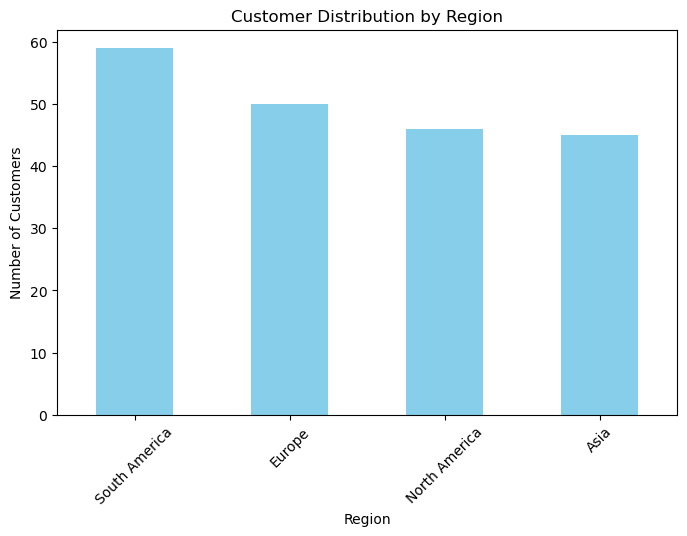

In [29]:
plt.figure(figsize=(8, 5))
customer_region.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# 2. Top revenue-generating products

In [30]:
top_products = data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top 10 revenue-generating products:\n", top_products)

Top 10 revenue-generating products:
 ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


# Plot top revenue-generating products

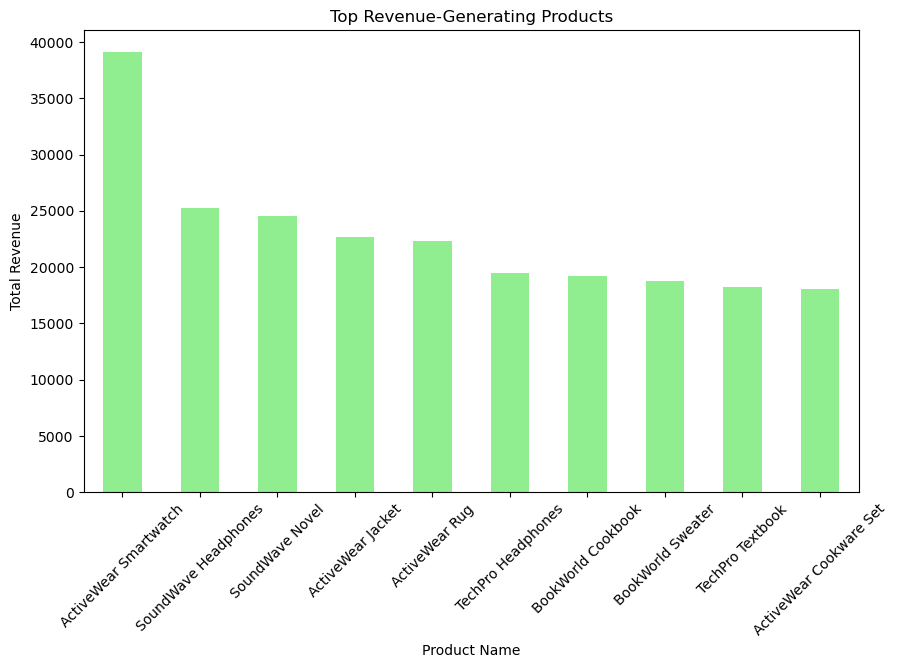

In [31]:
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='lightgreen')
plt.title('Top Revenue-Generating Products')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# 3. Seasonal sales trends

In [32]:
data['Month'] = data['TransactionDate'].dt.month
monthly_sales = data.groupby('Month')['TotalValue'].sum()
print("Monthly sales trends:\n", monthly_sales)

Monthly sales trends:
 Month
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64


# Plot monthly sales trends

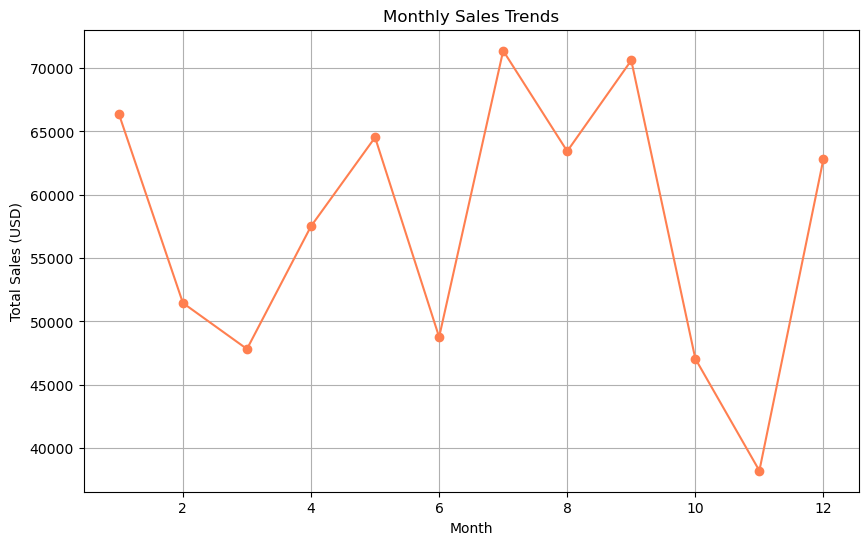

In [33]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='coral')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.show()

# 4. Regional revenue contribution

In [34]:
regional_revenue = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue contribution by region:\n", regional_revenue)

Revenue contribution by region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


# Plot regional revenue contribution

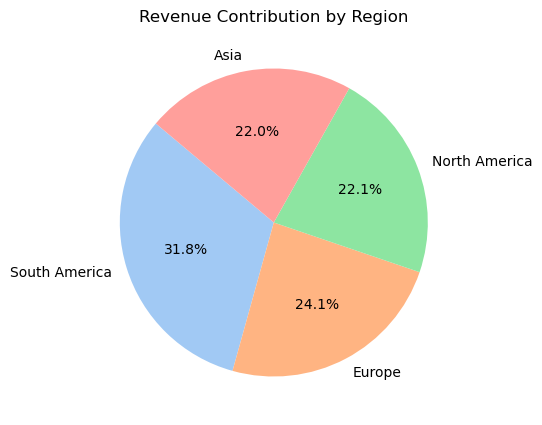

In [35]:
plt.figure(figsize=(8, 5))
regional_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Revenue Contribution by Region')
plt.ylabel('')
plt.show()

# 5. High-value customers (Customer Lifetime Value)

In [36]:
customer_lifetime_value = data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top 10 high-value customers:\n", customer_lifetime_value)

Top 10 high-value customers:
 CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


# Plot high-value customers

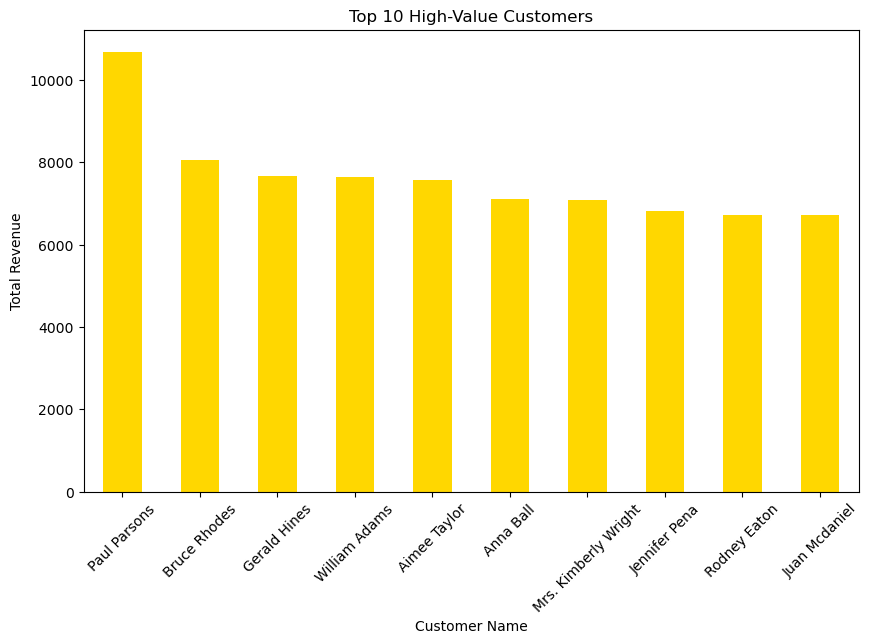

In [37]:
plt.figure(figsize=(10, 6))
customer_lifetime_value.plot(kind='bar', color='gold')
plt.title('Top 10 High-Value Customers')
plt.xlabel('Customer Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()